In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt  
import 

Задание № 0

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.

In [1]:
delta = 3
sigma_2 = 225
b = 0.95
a = 1 - b 

n = (2.24 * (sigma_2 ** 0.5) / delta) ** 2

n


125.44000000000003

Задание № 1

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.


In [2]:
x = 130
n = 25
sigma = 12


xmin = x - sigma*2.58/ n ** 0.5
xmax = x + sigma*2.58/ n ** 0.5

print(xmin, xmax)


123.80799999999999 136.192


Задание № 2

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально

In [5]:
#нулевая гипотеза - выборки отличаются незначительно
population_men  = scipy.stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = scipy.stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

a = 0.001
t, p = scipy.stats.ttest_ind(population_men, population_women)
if p < a:
    print('Отклоняем нулевую гипотезу')
else: print ('Принимаем нулевую гипотезу')

Принимаем нулевую гипотезу


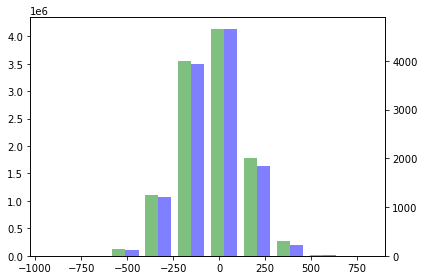

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([population_men, population_women])
n, bins, patches = ax1.hist([population_men, population_women])
ax1.cla() 

width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, color='g', alpha = 0.5)
ax2.bar(bins_shifted[:-1], n[1], width, color='b', alpha = 0.5)

plt.tight_layout()
plt.show()

Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение  𝜎=150 ;
уровень доверия  𝛽  = 95%;
Погрешность  Δ=50  рублей.

In [5]:
sigma = 150
b = 0.95
delta = 50

n = (sigma * 2.24 / delta) ** 2
n

45.15840000000002

Задание № 4

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).

In [7]:

observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [11]:
#Нулевая гипотеза - предсказания удовлетоворительны

oddsratio, pvalue = scipy.stats.fisher_exact(observations)
pvalue

a = 0.05
if pvalue< a:
    print('Отклоняем нулевую гипотезу')
else: print ('Принимаем нулевую гипотезу')

Принимаем нулевую гипотезу



Задание № 5

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:



In [19]:
import numpy as np
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  
    return m-h, m, m+h  

In [20]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, confidence = 0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

Задание № 6
Принадлежат ли выборки data_1 и data_2 одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

Отклоняем нулевую гипотезу


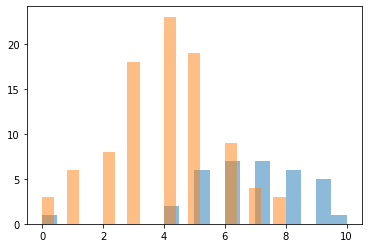

In [13]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
 

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]
#нулевая гипотеза - выборки принадлежат одному множеству

t, p = scipy.stats.ttest_ind(data_1, data_2)
t, p 
plt.hist(data_1, bins = 20, alpha = 0.5)
plt.hist(data_2, bins = 20, alpha = 0.5)

a = 0.05
if p< a:
    print('Отклоняем нулевую гипотезу')
else: print ('Принимаем нулевую гипотезу')

Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [13]:
p_value = 0.03
a = 0.05
#нулевая гипотеза - распределение нормально
if p_value < a:
    print('Отклоняем нулевую гипотезу')
else: print ('Принимаем нулевую гипотезу')

Отклоняем нулевую гипотезу


Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

p-value = 0.05995260332765237
Принимаем нулевую гипотезу


(array([ 2.,  1.,  4.,  7.,  9., 15., 17., 20., 25., 24., 32., 33., 24.,
        16., 19., 16., 18., 12.,  2.,  4.]),
 array([-132.70670939, -120.16728562, -107.62786186,  -95.0884381 ,
         -82.54901434,  -70.00959058,  -57.47016682,  -44.93074306,
         -32.3913193 ,  -19.85189554,   -7.31247177,    5.22695199,
          17.76637575,   30.30579951,   42.84522327,   55.38464703,
          67.92407079,   80.46349455,   93.00291831,  105.54234208,
         118.08176584]),
 <a list of 20 Patch objects>)

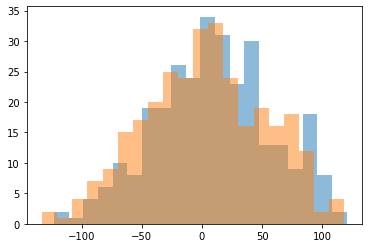

In [15]:
np.random.seed(11)
A = scipy.stats.norm.rvs(scale = 50,loc = 10,size = 300)
B = A + scipy.stats.norm.rvs(scale = 10,loc = -7.5,size = 300)

t, p_value = scipy.stats.ttest_ind(A, B, equal_var = False) 

print("p-value = " + str(p_value))
a = 0.05
#нулевая гипотеза - различия между выборками случайно
if p_value < a:
    print('Отклоняем нулевую гипотезу')
else: print ('Принимаем нулевую гипотезу')
    
plt.hist(A, bins = 20, alpha = 0.5)
plt.hist(B, bins = 20, alpha = 0.5)